# Task 4 - Decision Tree
1. load housing dataset as before
2. define x and y
3. check for null duplicates
4. Use a decision tree regressor on a housing dataset to predict house prices.
5. analyse overfitting make commnet 
6. tune trees depth
7. analyze how it affects overfitting. make comment 




1. Build a decision tree classifier using the Iris dataset.

2. Visualize the decision tree and interpret the first two splits.

3. Use a decision tree regressor on a housing dataset to predict house prices. Tune the tree’s depth and analyze how it affects overfitting.



# irris Dataset

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
X = df.iloc[:, :-1] 
y = df['target']     


In [4]:
print("Null values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Null values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Duplicate rows: 1


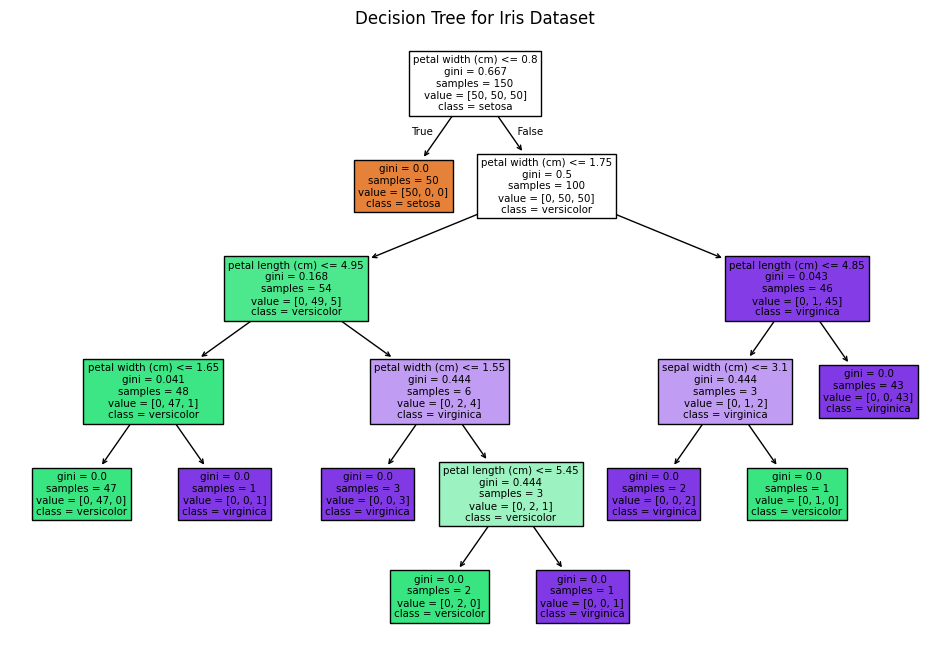

In [ ]:
# train decision tree
model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)

# Plot tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()


In [6]:
df['target'] = df['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Re-encode target to numeric for training
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# Predictions
y_pred = tree.predict(X_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)



Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Observations 
- The Decision Tree model achieved perfect performance on the test data accuracy, precision, recall, and F1-score are all 1.0 (100%).

- The confusion matrix shows that all samples were correctly classified with no misclassifications across any class. This means the model correctly identified all three flower species (setosa, versicolor, virginica).

We can see the Iris dataset is simple and well separated and a decision tree can easily learn its patterns.

# House prediction 

In [11]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [12]:
# Load the dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame.copy()

print("Shape:", df.shape)
print(df.head())


Shape: (506, 14)
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [13]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [14]:
print("Null values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Null values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Duplicate rows: 0


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Decision Tree
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_train = tree_reg.predict(X_train)
y_pred_test = tree_reg.predict(X_test)

# Evaluate
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Train R2:", r2_train)
print("Test R2:", r2_test)

Train R2: 1.0
Test R2: 0.6019035496385025


In [17]:
# clearly we can see the model is overfitting a lot , so we need to take the measures to aovid that. 


Depth: 1 | Train R²: 0.4734 | Test R²: 0.2462
Depth: 2 | Train R²: 0.7267 | Test R²: 0.5652
Depth: 3 | Train R²: 0.8291 | Test R²: 0.5897
Depth: 4 | Train R²: 0.8941 | Test R²: 0.5594
Depth: 5 | Train R²: 0.9307 | Test R²: 0.6065
Depth: 6 | Train R²: 0.9539 | Test R²: 0.5652
Depth: 7 | Train R²: 0.9715 | Test R²: 0.6017
Depth: 8 | Train R²: 0.9833 | Test R²: 0.5901
Depth: 9 | Train R²: 0.9905 | Test R²: 0.5871
Depth: 10 | Train R²: 0.9948 | Test R²: 0.6175
Depth: 11 | Train R²: 0.9974 | Test R²: 0.5592
Depth: 12 | Train R²: 0.9985 | Test R²: 0.6047
Depth: 13 | Train R²: 0.9991 | Test R²: 0.5352
Depth: 14 | Train R²: 0.9996 | Test R²: 0.6047
Depth: 15 | Train R²: 0.9999 | Test R²: 0.5443
Depth: 16 | Train R²: 1.0000 | Test R²: 0.6136
Depth: 17 | Train R²: 1.0000 | Test R²: 0.6105
Depth: 18 | Train R²: 1.0000 | Test R²: 0.6182
Depth: 19 | Train R²: 1.0000 | Test R²: 0.6070


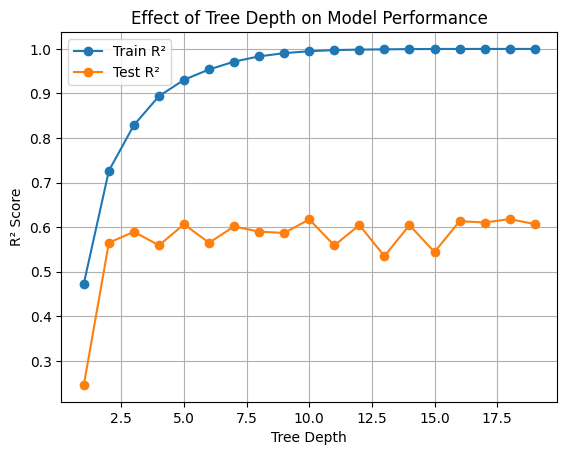

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

depths = range(1, 20)
train_scores = []
test_scores = []

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=0)
    tree.fit(X_train, y_train)
    r2_train = tree.score(X_train, y_train)
    r2_test = tree.score(X_test, y_test)
    train_scores.append(r2_train)
    test_scores.append(r2_test)
    print(f"Depth: {d} | Train R²: {r2_train:.4f} | Test R²: {r2_test:.4f}")

# Plot results
plt.plot(depths, train_scores, label='Train R²', marker='o')
plt.plot(depths, test_scores, label='Test R²', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('R² Score')
plt.title('Effect of Tree Depth on Model Performance')
plt.legend()
plt.grid(True)
plt.show()


# observations 
- As the tree depth increases, the training R² score keeps rising — from 0.47 (at depth 1) to 1.00 (perfect fit) by depth 16–19.

- The testing R² score, however, increases only up to around 0.61–0.62 and then starts to fluctuate instead of improving.

        This shows that after a certain depth (around 5–8), the model starts overfitting — it learns training data perfectly but fails to generalize well to unseen data.

- The best performance on test data seems to be around depth = 10 or 18, where R² ≈ 0.61–0.62.